![alt text](https://upload.wikimedia.org/wikipedia/commons/0/02/Stack_Overflow_logo.svg "Logo Title Text 1")
<br>
<br>

# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  StackOverFlow QnA Tag Prediction and Question Summarization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import warnings

import pickle
import time

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans


import logging

from scipy.sparse import hstack

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load the datasets

In [2]:
questions = pd.read_csv("Questions.csv", encoding='latin-1')
questions.head(50)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [3]:
answers = pd.read_csv("Answers.csv", encoding='latin-1')
answers.head(50)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
5,332,59.0,2008-08-02T03:00:24Z,330,19,<p>I would be a bit reluctant to use nested cl...
6,344,100.0,2008-08-02T04:18:15Z,260,6,<p>You might be able to use IronRuby for that....
7,359,119.0,2008-08-02T06:16:23Z,260,5,"<P>You could use any of the DLR languages, whi..."
8,473,49.0,2008-08-02T15:33:13Z,470,8,"<p>No, what you're doing is fine. Don't let th..."
9,529,86.0,2008-08-02T18:16:07Z,180,3,<p>Isn't it also a factor which order you set ...


In [4]:
tags = pd.read_csv("Tags.csv")
tags.head(50)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


## Data Preprocessing

### Tags

In [5]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [6]:
tags['Tag'] = tags['Tag'].astype(str)

In [7]:
tags = tags.groupby('Id')['Tag'].apply(lambda x: ' '.join(x))

In [8]:
tags = pd.DataFrame(tags)

In [9]:
tags

,Tag
Id,
80,flex actionscript-3 air
90,svn tortoisesvn branch branching-and-merging
120,sql asp.net sitemap
180,algorithm language-agnostic colors color-space
260,c# .net scripting compiler-construction
330,c++ oop class nested-class
470,.net web-services
580,sql-server sql-server-2005 deployment release-...
650,c# visual-studio versioning


In [10]:
tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
5,330,c++ oop class nested-class
6,470,.net web-services
7,580,sql-server sql-server-2005 deployment release-...
8,650,c# visual-studio versioning
9,810,windows visual-studio registry installation


In [11]:
len(answers)

2014516

In [12]:
questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)

In [13]:
ques_tag = questions.merge(tags, on = 'Id')

In [14]:
len(ques_tag)

1264216

In [15]:
ques_tag

,Id,Score,Title,Body,Tag
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction
5,330,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++ oop class nested-class
6,470,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,.net web-services
7,580,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,sql-server sql-server-2005 deployment release-...
8,650,79,Automatically update version number,<p>I would like the version property of my app...,c# visual-studio versioning
9,810,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...,windows visual-studio registry installation


In [16]:
ques_tag1 = ques_tag[ques_tag['Score']>5]


In [17]:
len(ques_tag1)

72950

In [18]:
ques_tag2 = ques_tag[ques_tag['Score']>10]
len(ques_tag2)

32604

In [19]:
ques_tag = ques_tag2

In [20]:
ques_tag['Tag'] = ques_tag['Tag'].apply(lambda x: x.split())

In [21]:
ques_tag['Tag']

0                                [flex, actionscript-3, air]
1          [svn, tortoisesvn, branch, branching-and-merging]
2                                    [sql, asp.net, sitemap]
3          [algorithm, language-agnostic, colors, color-s...
4               [c#, .net, scripting, compiler-construction]
5                            [c++, oop, class, nested-class]
6                                       [.net, web-services]
7          [sql-server, sql-server-2005, deployment, rele...
8                            [c#, visual-studio, versioning]
10                         [c#, database, loops, connection]
11                                             [c#, asp.net]
12                                        [c#, file-locking]
13                                              [unix, size]
14                         [svn, msbuild, cruisecontrol.net]
15               [web-applications, dns, subdomain, account]
16                           [.net, .net-3.5, msbuild, nant]
17                      

In [22]:
just_tags = [item for sublist in ques_tag['Tag'].values for item in sublist]

In [23]:
just_tags

['flex',
 'actionscript-3',
 'air',
 'svn',
 'tortoisesvn',
 'branch',
 'branching-and-merging',
 'sql',
 'asp.net',
 'sitemap',
 'algorithm',
 'language-agnostic',
 'colors',
 'color-space',
 'c#',
 '.net',
 'scripting',
 'compiler-construction',
 'c++',
 'oop',
 'class',
 'nested-class',
 '.net',
 'web-services',
 'sql-server',
 'sql-server-2005',
 'deployment',
 'release-management',
 'c#',
 'visual-studio',
 'versioning',
 'c#',
 'database',
 'loops',
 'connection',
 'c#',
 'asp.net',
 'c#',
 'file-locking',
 'unix',
 'size',
 'svn',
 'msbuild',
 'cruisecontrol.net',
 'web-applications',
 'dns',
 'subdomain',
 'account',
 '.net',
 '.net-3.5',
 'msbuild',
 'nant',
 'sql-server',
 'windows-server-2008',
 'sql-server',
 'sql-server-2008',
 'sql-server',
 'c#',
 '.net',
 'unit-testing',
 'testing',
 'svn',
 'version-control',
 'sql',
 'sql-server',
 'c#',
 'dataset',
 'datatable',
 'html',
 'autocomplete',
 'c',
 'architecture',
 'data-structures',
 'asp.net',
 'flash',
 'video',
 'emb

In [24]:
len(just_tags)

99335

In [25]:
unique_tags = list(set(just_tags))


In [26]:
len(unique_tags)

9766

In [28]:
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

keywords = nltk.FreqDist(just_tags)
print(keywords)
keywords = nltk.FreqDist(keywords)

freq_tags = keywords.most_common(100)
tags_features = [word[0] for word in freq_tags]

<FreqDist with 9766 samples and 99335 outcomes>


In [29]:
keywords

FreqDist({'java': 3052, 'c#': 3017, 'javascript': 2505, 'android': 2430, 'python': 2027, 'c++': 1919, '.net': 1280, 'php': 1236, 'jquery': 1235, 'ios': 1174, ...})

In [30]:
tags_features

['java',
 'c#',
 'javascript',
 'android',
 'python',
 'c++',
 '.net',
 'php',
 'jquery',
 'ios',
 'html',
 'css',
 'iphone',
 'c',
 'objective-c',
 'ruby-on-rails',
 'ruby',
 'sql',
 'git',
 'mysql',
 'asp.net',
 'linux',
 'asp.net-mvc',
 'string',
 'r',
 'angularjs',
 'node.js',
 'performance',
 'eclipse',
 'sql-server',
 'xcode',
 'django',
 'arrays',
 'algorithm',
 'wpf',
 'windows',
 'haskell',
 'c++11',
 'visual-studio',
 'json',
 'scala',
 'bash',
 'regex',
 'multithreading',
 'swift',
 'database',
 'osx',
 'unit-testing',
 'html5',
 'xml',
 'spring',
 'cocoa-touch',
 'ruby-on-rails-3',
 'debugging',
 'ajax',
 'twitter-bootstrap',
 'vim',
 'visual-studio-2010',
 'entity-framework',
 'linq',
 'shell',
 'mongodb',
 'postgresql',
 'list',
 'winforms',
 'generics',
 'oop',
 'svn',
 'cocoa',
 'css3',
 'google-chrome',
 'github',
 'http',
 'gcc',
 'asp.net-mvc-3',
 'maven',
 'perl',
 'math',
 'tsql',
 'oracle',
 'exception',
 'security',
 'rest',
 'templates',
 'image',
 'datetime',
 

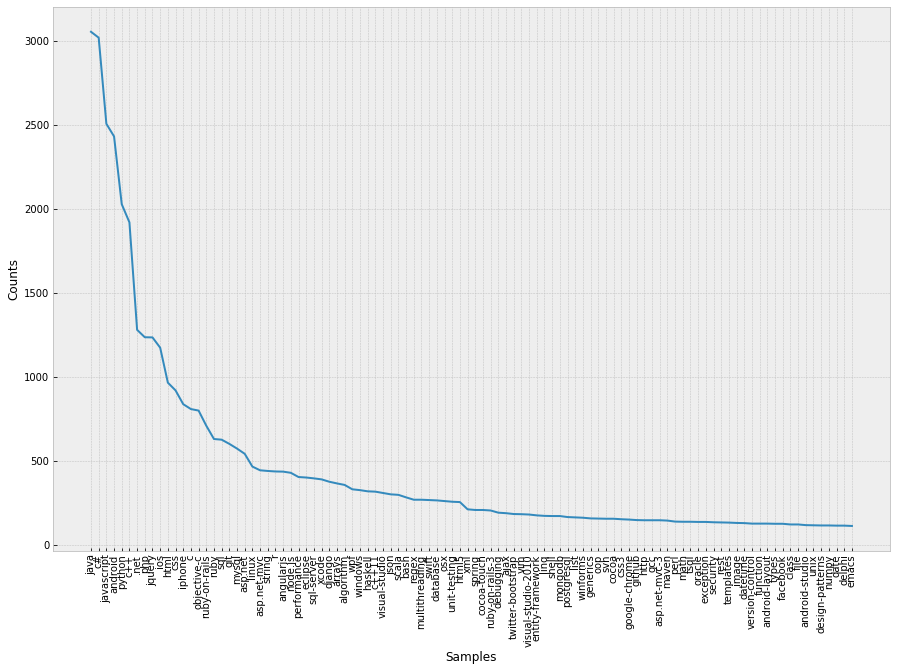

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)
plt.show()

In [32]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [33]:
ques_tag['Tag'] = ques_tag['Tag'].apply(lambda x: most_common(x))
ques_tag['Tag'] = ques_tag['Tag'].apply(lambda x: x if len(x)>0 else None)

In [34]:
ques_tag

,Id,Score,Title,Body,Tag
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,None
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,330,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"
6,470,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,[.net]
7,580,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,[sql-server]
8,650,79,Automatically update version number,<p>I would like the version property of my app...,"[c#, visual-studio]"
10,930,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,"[c#, database]"


In [35]:
len(ques_tag)

32604

In [36]:
ques_tag.dropna(subset=['Tag'], inplace=True)

In [37]:
len(ques_tag)

28709

### Question

In [38]:
ques_tag['Body']  = ques_tag['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [39]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [40]:
ques_tag['Body'] = ques_tag['Body'].apply(lambda x: clean_text(x)) 

In [41]:
ques_tag['Body']

1          are there any really good tutorials explaining...
2          has anyone got experience creating sql-based a...
3          this is something i have pseudo-solved many ti...
4          i have a little game written in c#. it uses a ...
5          i am working on a collection of classes used f...
6          i have been writing a few web services for a ....
7          i wonder how you guys manage deployment of a d...
8          i would like the version property of my applic...
10         what is the simplest way to connect and query ...
11         i need to grab the base64-encoded representati...
12         i am looking for a way to delete a file which ...
13         what is the correct way to get the process siz...
14         i am using ccnet on a sample project with svn ...
16         i am using msbuild to build my stuff. i want t...
17         i am setting up a dedicated sql server 2005 bo...
18         i always create a new empty database, after th...
19         if i am addin

In [42]:
token=ToktokTokenizer()

In [43]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [45]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [46]:
def clean_punct(text): 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [47]:
ques_tag['Body'] = ques_tag['Body'].apply(lambda x: clean_punct(x)) 

In [48]:
ques_tag['Body']

1          are there any really good tutorials explaining...
2          has anyone got experience creating sqlbased as...
3          this is something i have pseudosolved many tim...
4          i have a little game written in c it uses a da...
5          i am working on a collection of classes used f...
6          i have been writing a few web services for a n...
7          i wonder how you guys manage deployment of a d...
8          i would like the version property of my applic...
10         what is the simplest way to connect and query ...
11         i need to grab the base64encoded representatio...
12         i am looking for a way to delete a file which ...
13         what is the correct way to get the process siz...
14         i am using ccnet on a sample project with svn ...
16         i am using msbuild to build my stuff i want to...
17         i am setting up a dedicated sql server 2005 bo...
18         i always create a new empty database after tha...
19         if i am addin

In [49]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [50]:
def lemmatizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w)
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [51]:
ques_tag['Body'] = ques_tag['Body'].apply(lambda x: lemmatizeWords(x)) 
ques_tag['Body'] = ques_tag['Body'].apply(lambda x: stopWordsRemove(x)) 

In [52]:
ques_tag['Title'] = ques_tag['Title'].apply(lambda x: str(x))
ques_tag['Title'] = ques_tag['Title'].apply(lambda x: clean_text(x)) 
ques_tag['Title'] = ques_tag['Title'].apply(lambda x: clean_punct(x)) 
ques_tag['Title'] = ques_tag['Title'].apply(lambda x: lemmatizeWords(x)) 
ques_tag['Title'] = ques_tag['Title'].apply(lambda x: stopWordsRemove(x)) 

## Tag Prediction

In [53]:
X1 = ques_tag['Body']
X2 = ques_tag['Title']
y = ques_tag['Tag']

In [54]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [66]:
vectorizer = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+")


In [68]:
X1_tfidf = vectorizer.fit_transform(X1)
X2_tfidf = vectorizer.fit_transform(X2)

In [57]:
X_tfidf = hstack([X1_tfidf,X2_tfidf])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

### Hamming loss: the fraction of the wrong labels to the total number of labels, This is a loss function, so the optimal value is zero.


### Jaccard index: also called Intersection over Union in the multi-label setting, is defined as the number of correctly predicted labels divided by the union of predicted and true labels, 

In [59]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("____")   

### Using The Decision Tree Classifier

Decision tree is a type of supervised learning algorithm. It works for both categorical and continuous input and output variables. In this technique, we split the sample into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

A decision tree is drawn upside down with its root at the top. An internal node is actually a condition based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf.

In [60]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

dty_pred = classifier.predict(X_test)

print_score(dty_pred, classifier)

Clf:  DecisionTreeClassifier
Jacard score: 46.864768373389055
Hamming loss: 1.4388714733542318
____


### Using The Random Forest Classifier

Random Forest is a supervised learning algorithm. It is an ensemble of Decision Trees. It uses the bagging method which is that a combination of learning models increases the overall result.

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

rfy_pred = classifier.predict(X_test)

print_score(rfy_pred, classifier)

Clf:  RandomForestClassifier
Jacard score: 18.996574944850806
Hamming loss: 1.3409961685823755
____


### One-vs-rest strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. 

### Using SVC

-SVM can be used to do binary classification 
-SVM finds a hyper-plane (line in 2d, plane in 3d, etc) that separates its training data in such a way that the distance between the hyper plane and the closest points from each class is maximized. 
-once SVM finds this hyper-plane, you can classify new data points by seeing which side of this hyper-plane they land on 
-SVM can only be used on data that is linearly separable (i.e. a hyper-plane can be drawn between the two groups)

y = wT + b
y : classification label w : parameters of the plane b : moves hyperplane in and out of the origin

Hyperplane is also known as the decision boundary, it separates the two classes of data. While also having the property of being the most further away from both classes. Equation for the hyperplane is 
wT + b = 0 
![](https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg)

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

classifier = OneVsRestClassifier(LinearSVC())
classifier.fit(X_train, y_train)

svcy_pred = classifier.predict(X_test)

print_score(svcy_pred, classifier)

Clf:  OneVsRestClassifier
Jacard score: 51.150296064089176
Hamming loss: 0.9341692789968652
____


### Using Logistic Regression

In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)

lry_pred = classifier.predict(X_test)

print_score(lry_pred, classifier)

Clf:  OneVsRestClassifier
Jacard score: 37.778648554510625
Hamming loss: 1.0813305468477883
____


In [64]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], svcy_pred[:,i]))
    print("")

.net
[[5443   39]
 [ 203   57]]

ajax
[[5696    7]
 [  22   17]]

algorithm
[[5669    5]
 [  49   19]]

android
[[5242   19]
 [  86  395]]

android-layout
[[5708    3]
 [  27    4]]

android-studio
[[5705    1]
 [  12   24]]

angularjs
[[5654    1]
 [  21   66]]

arrays
[[5664   12]
 [  40   26]]

asp.net
[[5628    9]
 [  69   36]]

asp.net-mvc
[[5638   12]
 [  46   46]]

asp.net-mvc-3
[[5704    4]
 [  33    1]]

bash
[[5674    5]
 [  33   30]]

c
[[5565   17]
 [ 103   57]]

c#
[[4995  112]
 [ 375  260]]

c++
[[5358   24]
 [ 125  235]]

c++11
[[5675    5]
 [  38   24]]

class
[[5719    1]
 [  20    2]]

cocoa
[[5720    1]
 [  18    3]]

cocoa-touch
[[5700    0]
 [  42    0]]

css
[[5560   16]
 [  47  119]]

css3
[[5707    3]
 [  26    6]]

database
[[5700    5]
 [  33    4]]

date
[[5711    2]
 [  24    5]]

datetime
[[5718    2]
 [  17    5]]

debugging
[[5689   11]
 [  31   11]]

delphi
[[5713    0]
 [  15   14]]

design-patterns
[[5721    3]
 [  14    4]]

django
[[5667    2]
 [  12

## PART 2 : Text Summarizer

In [36]:
import pandas as pd
import re
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
df_questions = pd.read_csv("G:/Data/Questions.csv", nrows=5000,usecols =['Score', 'Title', 'Body'],encoding='latin1')
df_questions = df_questions.dropna()
df_questions.head(15)

,Score,Title,Body
0,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,79,Automatically update version number,<p>I would like the version property of my app...
9,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [ ]:
#!python -m spacy link en_core_web_lg en

In [10]:
def remove_tags(text):
    t=BeautifulSoup(text).get_text()
    return t.replace("\n", "")

In [11]:
df_questions['Body_Cleaned_1'] = df_questions['Body'].apply(remove_tags)

In [12]:
print('Before\n')
print(df_questions['Body'][2])
print('\nAfter\n')
print(df_questions['Body_Cleaned_1'][2])

Before

<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>

<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>

<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>


After

Has anyone got experience creating SQL-based ASP.NET site-map providers?I've got the default XML file web.sitemap working properly with my Menu and SiteMapPath controls, but I'll need a way for the users of my site to create and modify pages dynamically.I need to tie page viewing permissions into the standard ASP.NET membership system as well.


In [37]:
token=ToktokTokenizer()
def clean_punct(text): 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

lemma=WordNetLemmatizer()
def lemmatizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english")
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))



In [41]:

df_questions['Body_Cleaned'] = df_questions['Body_Cleaned_1'].apply(lambda x: clean_punct(x))

In [42]:
df_questions['Body_Cleaned'] = df_questions['Body_Cleaned'].apply(lambda x: stopWordsRemove(x))
df_questions['Body_Cleaned'] = df_questions['Body_Cleaned'].apply(lambda x: lemmatizeWords(x))

In [47]:
print('Before\n')
print(df_questions['Body_Cleaned_1'][2])
print('\nAfter\n')
print(df_questions['Body_Cleaned'][2])

Before

Has anyone got experience creating SQL-based ASP.NET site-map providers?I've got the default XML file web.sitemap working properly with my Menu and SiteMapPath controls, but I'll need a way for the users of my site to create and modify pages dynamically.I need to tie page viewing permissions into the standard ASP.NET membership system as well.

After

Has anyone get experience create SQLbased ASPNET sitemap providersIve get default XML file websitemap work properly Menu SiteMapPath control Ill need way users site create modify page dynamicallyI need tie page view permissions standard ASPNET membership system well


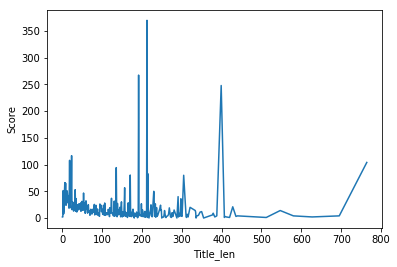

In [48]:
df_questions['Title_len'] = df_questions['Body_Cleaned'].str.split().str.len()
df = df_questions.groupby('Title_len')['Score'].mean().reset_index()
sns.lineplot(x=df['Title_len'], y=df['Score'], data=df)

### Question Summarizer


In [49]:
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/10/block_3.png "Logo Title Text 1")
<br>
<br>

#### 1. split the text into individual sentences
#### 2. In the next step, we will find vector representation (word embeddings) for each and every sentence
#### 3. Similarities between sentence vectors are then calculated and stored in a matrix
#### 4. The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
#### 5. Finally, a certain number of top-ranked sentences form the final summary


In [50]:
stop_words = stopwords.words('english')

def summarization(text, top_n=2):
    summary=""
    
    summarize_text = []
    sentences = []
    text1 = text.split('.')
    
    for sentence in text1:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    similarity_martix = build_similarity_matrix(sentences, stop_words)
    similarity_graph = nx.from_numpy_array(similarity_martix)
    scores = nx.pagerank(similarity_graph)
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    
    summary = ". ".join(summarize_text)
    return summary



def find_cosine_sim(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
    sent1 = [word.lower() for word in sent1]
    sent2 = [word.lower() for word in sent2]
 
    total_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(total_words)
    vector2 = [0] * len(total_words)
 
    for w in sent1:
        if w in stopwords:
            continue
        vector1[total_words.index(w)] += 1
    
    for w in sent2:
        if w in stopwords:
            continue
        vector2[total_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
    
def build_similarity_matrix(sentences, stop_words):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: 
                continue 
            similarity_matrix[idx1][idx2] = find_cosine_sim(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix




In [51]:
s1=generate_summary(df_questions['Body_Cleaned_1'][3])
print("Original Text:\n")
print(df_questions['Body_Cleaned_1'][3])
print('\n\nSummarized text:\n')
print(s1)  

Original Text:

This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate N colors, that are as distinguishable as possible where N is a parameter.


Summarized text:

 The problem is to come up with a way to generate N colors, that are as distinguishable as possible where N is a parameter.  That's stuck with me
